# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, RANSACRegressor, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
import time 


# California Housing  Dataset: Import and Feature Scaling

In [2]:
# Import Dataset
cal_housing  = fetch_california_housing()

df_features = pd.DataFrame(cal_housing.data, columns = cal_housing.feature_names)
df_target = pd.DataFrame(cal_housing.target, columns=['MEDV'])
df = pd.concat([df_features, df_target],axis=1)

X = df.iloc[:, 0:7].values
y = df.iloc[:, -1].values

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =1)


# Feature Scaling X
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Feature Scaling y
y_train_std = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_std = scaler.transform(y_test.reshape(-1,1)).flatten()


# Linear Regression

 Linear Regression

Mean Squared Error for training data: 0.608
Mean Squared Error for test data: 0.612
R^2 for training data: 0.546
R^2 for test data: 0.534
Running time to fit the model: 83.994 ms



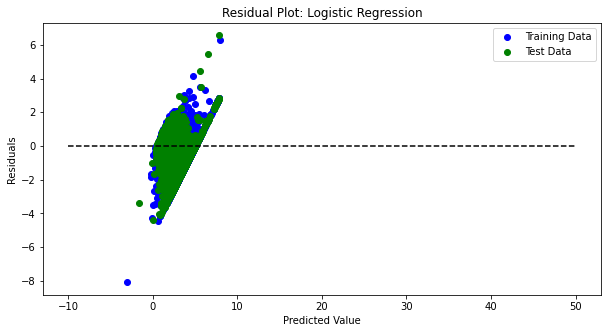

In [3]:
print (' Linear Regression\n')

lr_reg = LinearRegression()

# Fit
start = time.time()
lr_reg.fit(X_train_std,y_train_std)
finish = time.time()

# Prediction
y_pred_std = lr_reg.predict(X_test_std)

#Prediction on Train set

train_pred_std = lr_reg.predict(X_train_std)

# Convert the scaled predictions back to the original scale

y_pred = scaler.inverse_transform(y_pred_std.reshape(-1,1)).flatten()
train_pred = scaler.inverse_transform(train_pred_std.reshape(-1,1)).flatten()


# Checking Performance using different matrix

mse_train = mean_squared_error(y_train,train_pred)
r2_train = r2_score(y_train,train_pred)

mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test, y_pred)


print('Mean Squared Error for training data: {:.3f}'.format(mse_train))
print('Mean Squared Error for test data: {:.3f}'.format(mse_test))
print('R^2 for training data: {:.3f}'.format(r2_train))
print('R^2 for test data: {:.3f}'.format(r2_test))
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))


# Residual Plot

train_residuals = train_pred - y_train
test_residuals =  y_pred - y_test

plt.figure(figsize=(10, 5))
plt.scatter(train_pred, train_residuals, c= 'blue', label = 'Training Data')
plt.scatter(y_pred, test_residuals, c= 'green', label = 'Test Data')
plt.hlines(y=0,xmin=-10,xmax=50, color='black', linestyle='--')
plt.title('Residual Plot: Logistic Regression')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# RANSAC Regressor

RANSAC Regressor

Mean Squared Error for training data: 5.643
Mean Squared Error for test data: 0.618
R^2 for training data: -3.216
R^2 for test data: 0.530
Running time to fit the model: 138.921 ms



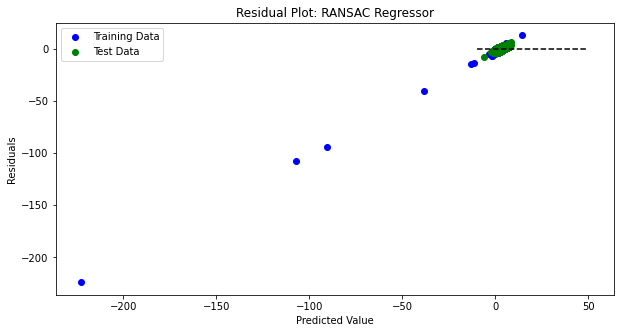

In [4]:
print ('RANSAC Regressor\n')

ransac = RANSACRegressor(LinearRegression(), min_samples = 50, random_state=1)

# Fit
start = time.time()
ransac.fit(X_train_std,y_train_std)
finish = time.time()

# Prediction
y_pred_std = ransac.predict(X_test_std)

#Prediction on Train set

train_pred_std = ransac.predict(X_train_std)

# Convert the scaled predictions back to the original scale

y_pred = scaler.inverse_transform(y_pred_std.reshape(-1,1)).flatten()
train_pred = scaler.inverse_transform(train_pred_std.reshape(-1,1)).flatten()

# Checking Performance using different matrix

mse_train = mean_squared_error(y_train,train_pred)
r2_train = r2_score(y_train,train_pred)

mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test, y_pred)


print('Mean Squared Error for training data: {:.3f}'.format(mse_train))
print('Mean Squared Error for test data: {:.3f}'.format(mse_test))
print('R^2 for training data: {:.3f}'.format(r2_train))
print('R^2 for test data: {:.3f}'.format(r2_test))
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))


# Residual Plot

train_residuals = train_pred - y_train
test_residuals =  y_pred - y_test

plt.figure(figsize=(10, 5))
plt.scatter(train_pred, train_residuals, c= 'blue', label = 'Training Data')
plt.scatter(y_pred, test_residuals, c= 'green', label = 'Test Data')
plt.hlines(y=0,xmin=-10,xmax=50, color='black', linestyle='--')
plt.title('Residual Plot: RANSAC Regressor')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Ridge Regression

Ridge Regression

Ridge regression with alpha = 0.1
Mean Squared Error for training data: 0.608
Mean Squared Error for test data: 0.612
R^2 for training data: 0.546
R^2 for test data: 0.534
Running time to fit the model: 17.990 ms



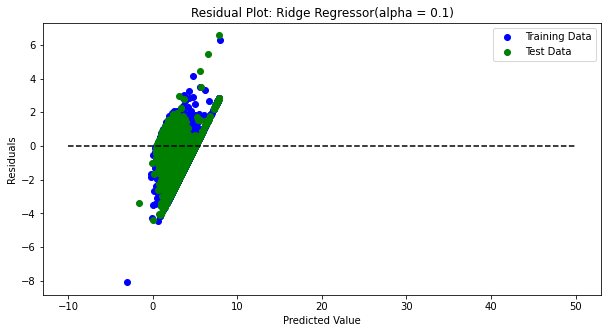

Ridge regression with alpha = 1
Mean Squared Error for training data: 0.608
Mean Squared Error for test data: 0.612
R^2 for training data: 0.546
R^2 for test data: 0.534
Running time to fit the model: 4.000 ms



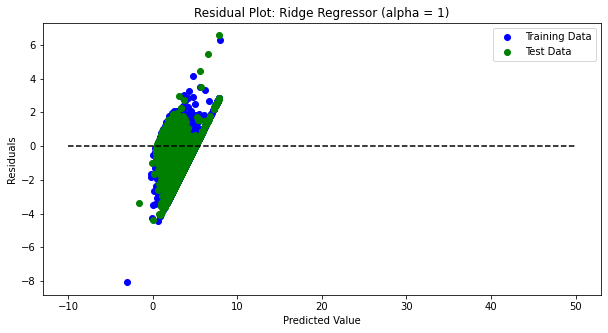

In [5]:
print ('Ridge Regression\n')

ridge1 = Ridge(alpha =0.1, solver = 'auto')
ridge2 = Ridge(alpha =1,solver = 'svd')


# ridge regression with alpha = 0.1
# Fit
start = time.time()
ridge1.fit(X_train_std,y_train_std)
finish = time.time()

# Prediction
y_pred_std = ridge1.predict(X_test_std)

#Prediction on Train set

train_pred_std = ridge1.predict(X_train_std)

# Convert the scaled predictions back to the original scale

y_pred = scaler.inverse_transform(y_pred_std.reshape(-1,1)).flatten()
train_pred = scaler.inverse_transform(train_pred_std.reshape(-1,1)).flatten()

# Checking Performance using different matrix

mse_train = mean_squared_error(y_train,train_pred)
r2_train = r2_score(y_train,train_pred)

mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test, y_pred)

print('Ridge regression with alpha = 0.1')
print('Mean Squared Error for training data: {:.3f}'.format(mse_train))
print('Mean Squared Error for test data: {:.3f}'.format(mse_test))
print('R^2 for training data: {:.3f}'.format(r2_train))
print('R^2 for test data: {:.3f}'.format(r2_test))
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))


# Residual Plot

train_residuals = train_pred - y_train
test_residuals =  y_pred - y_test

plt.figure(figsize=(10, 5))
plt.scatter(train_pred, train_residuals, c= 'blue', label = 'Training Data')
plt.scatter(y_pred, test_residuals, c= 'green', label = 'Test Data')
plt.hlines(y=0,xmin=-10,xmax=50, color='black', linestyle='--')
plt.title('Residual Plot: Ridge Regressor(alpha = 0.1)')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.legend()
plt.show()

################################################################################################

# ridge regression with alpha = 1
# Fit
start = time.time()
ridge2.fit(X_train_std,y_train_std)
finish = time.time()

# Prediction
y_pred_std = ridge2.predict(X_test_std)

#Prediction on Train set

train_pred_std = ridge2.predict(X_train_std)

# Convert the scaled predictions back to the original scale

y_pred = scaler.inverse_transform(y_pred_std.reshape(-1,1)).flatten()
train_pred = scaler.inverse_transform(train_pred_std.reshape(-1,1)).flatten()

# Checking Performance using different matrix

mse_train = mean_squared_error(y_train,train_pred)
r2_train = r2_score(y_train,train_pred)

mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test, y_pred)

print('Ridge regression with alpha = 1')
print('Mean Squared Error for training data: {:.3f}'.format(mse_train))
print('Mean Squared Error for test data: {:.3f}'.format(mse_test))
print('R^2 for training data: {:.3f}'.format(r2_train))
print('R^2 for test data: {:.3f}'.format(r2_test))
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))


# Residual Plot

train_residuals = train_pred - y_train
test_residuals =  y_pred - y_test

plt.figure(figsize=(10, 5))
plt.scatter(train_pred, train_residuals, c= 'blue', label = 'Training Data')
plt.scatter(y_pred, test_residuals, c= 'green', label = 'Test Data')
plt.hlines(y=0,xmin=-10,xmax=50, color='black', linestyle='--')
plt.title('Residual Plot: Ridge Regressor (alpha = 1)')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.legend()
plt.show()


# LASSO

LASSO Regressor

LASSO Regressor with alpha = 0.1
Mean Squared Error for training data: 0.683
Mean Squared Error for test data: 0.677
R^2 for training data: 0.490
R^2 for test data: 0.485
Running time to fit the model: 3.998 ms



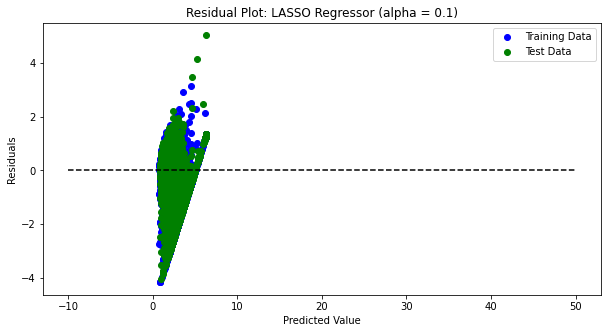

LASSO Regressor with alpha = 0.5
Mean Squared Error for training data: 1.036
Mean Squared Error for test data: 1.014
R^2 for training data: 0.226
R^2 for test data: 0.229
Running time to fit the model: 2.999 ms



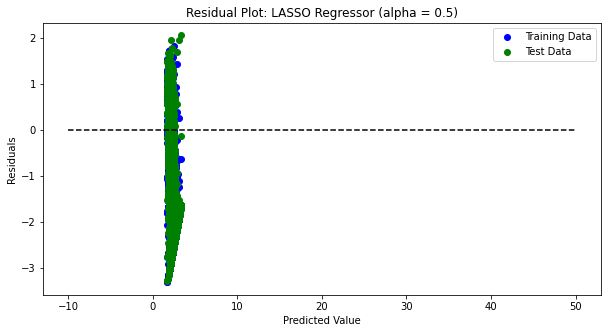

In [6]:
print ('LASSO Regressor\n')

lasso1 = Lasso(alpha =0.1)
lasso2 = Lasso(alpha =0.5)


# lasso regressor with alpha = 0.1
# Fit
start = time.time()
lasso1.fit(X_train_std,y_train_std)
finish = time.time()

# Prediction
y_pred_std = lasso1.predict(X_test_std)

#Prediction on Train set

train_pred_std = lasso1.predict(X_train_std)

# Convert the scaled predictions back to the original scale

y_pred = scaler.inverse_transform(y_pred_std.reshape(-1,1)).flatten()
train_pred = scaler.inverse_transform(train_pred_std.reshape(-1,1)).flatten()

# Checking Performance using different matrix

mse_train = mean_squared_error(y_train,train_pred)
r2_train = r2_score(y_train,train_pred)

mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test, y_pred)

print('LASSO Regressor with alpha = 0.1')
print('Mean Squared Error for training data: {:.3f}'.format(mse_train))
print('Mean Squared Error for test data: {:.3f}'.format(mse_test))
print('R^2 for training data: {:.3f}'.format(r2_train))
print('R^2 for test data: {:.3f}'.format(r2_test))
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))


# Residual Plot

train_residuals = train_pred - y_train
test_residuals =  y_pred - y_test

plt.figure(figsize=(10, 5))
plt.scatter(train_pred, train_residuals, c= 'blue', label = 'Training Data')
plt.scatter(y_pred, test_residuals, c= 'green', label = 'Test Data')
plt.hlines(y=0,xmin=-10,xmax=50, color='black', linestyle='--')
plt.title('Residual Plot: LASSO Regressor (alpha = 0.1)')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.legend()
plt.show()

################################################################################################

# LASSO Regressor with alpha = 0.5
# Fit
start = time.time()
lasso2.fit(X_train_std,y_train_std)
finish = time.time()

# Prediction
y_pred_std = lasso2.predict(X_test_std)

#Prediction on Train set

train_pred_std = lasso2.predict(X_train_std)

# Convert the scaled predictions back to the original scale

y_pred = scaler.inverse_transform(y_pred_std.reshape(-1,1)).flatten()
train_pred = scaler.inverse_transform(train_pred_std.reshape(-1,1)).flatten()

# Checking Performance using different matrix

mse_train = mean_squared_error(y_train,train_pred)
r2_train = r2_score(y_train,train_pred)

mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test, y_pred)

print('LASSO Regressor with alpha = 0.5')
print('Mean Squared Error for training data: {:.3f}'.format(mse_train))
print('Mean Squared Error for test data: {:.3f}'.format(mse_test))
print('R^2 for training data: {:.3f}'.format(r2_train))
print('R^2 for test data: {:.3f}'.format(r2_test))
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))


# Residual Plot

train_residuals = train_pred - y_train
test_residuals =  y_pred - y_test

plt.figure(figsize=(10, 5))
plt.scatter(train_pred, train_residuals, c= 'blue', label = 'Training Data')
plt.scatter(y_pred, test_residuals, c= 'green', label = 'Test Data')
plt.hlines(y=0,xmin=-10,xmax=50, color='black', linestyle='--')
plt.title('Residual Plot: LASSO Regressor (alpha = 0.5)')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.legend()
plt.show()


# ElasticNet Regressor

ElasticNet Regressor

ElasticNet Regressor with alpha =0.1,l1_ratio = 0.5
Mean Squared Error for training data: 0.660
Mean Squared Error for test data: 0.656
R^2 for training data: 0.507
R^2 for test data: 0.501
Running time to fit the model: 3.997 ms



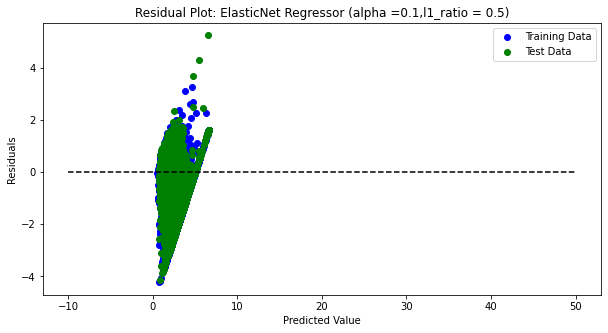

ElasticNet Regressor with alpha = alpha =1,l1_ratio = 0.5
Mean Squared Error for training data: 1.126
Mean Squared Error for test data: 1.103
R^2 for training data: 0.158
R^2 for test data: 0.161
Running time to fit the model: 3.998 ms



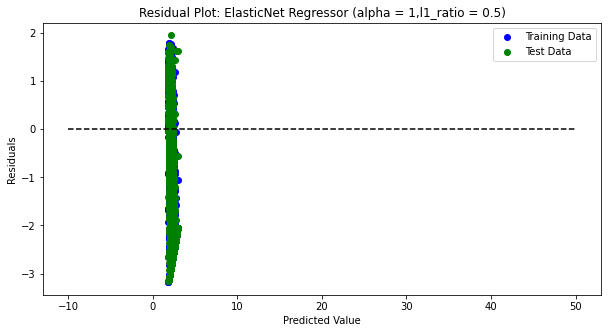

ElasticNet Regressor with alpha = 1,l1_ratio = 0.1
Mean Squared Error for training data: 0.883
Mean Squared Error for test data: 0.863
R^2 for training data: 0.341
R^2 for test data: 0.344
Running time to fit the model: 2.999 ms



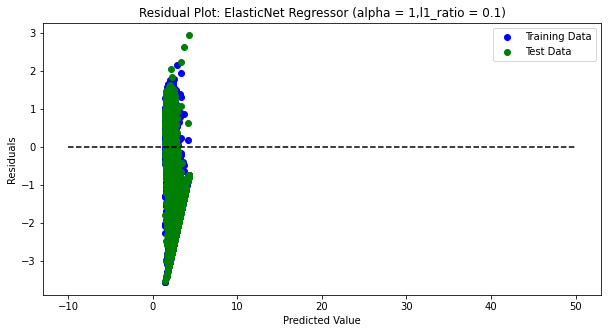

In [7]:
print ('ElasticNet Regressor\n')

elasticnet1 = ElasticNet(alpha =0.1, l1_ratio = 0.5)
elasticnet2 = ElasticNet(alpha =1, l1_ratio = 0.5 )
elasticnet3 = ElasticNet(alpha =1, l1_ratio = 0.1 )


# ElasticNet regressor with alpha = 0.1, l1_ration = 0.5
# Fit
start = time.time()
elasticnet1.fit(X_train_std,y_train_std)
finish = time.time()

# Prediction
y_pred_std = elasticnet1.predict(X_test_std)

#Prediction on Train set

train_pred_std = elasticnet1.predict(X_train_std)

# Convert the scaled predictions back to the original scale

y_pred = scaler.inverse_transform(y_pred_std.reshape(-1,1)).flatten()
train_pred = scaler.inverse_transform(train_pred_std.reshape(-1,1)).flatten()

# Checking Performance using different matrix

mse_train = mean_squared_error(y_train,train_pred)
r2_train = r2_score(y_train,train_pred)

mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test, y_pred)

print('ElasticNet Regressor with alpha =0.1,l1_ratio = 0.5')
print('Mean Squared Error for training data: {:.3f}'.format(mse_train))
print('Mean Squared Error for test data: {:.3f}'.format(mse_test))
print('R^2 for training data: {:.3f}'.format(r2_train))
print('R^2 for test data: {:.3f}'.format(r2_test))
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))


# Residual Plot

train_residuals = train_pred - y_train
test_residuals =  y_pred - y_test

plt.figure(figsize=(10, 5))
plt.scatter(train_pred, train_residuals, c= 'blue', label = 'Training Data')
plt.scatter(y_pred, test_residuals, c= 'green', label = 'Test Data')
plt.hlines(y=0,xmin=-10,xmax=50, color='black', linestyle='--')
plt.title('Residual Plot: ElasticNet Regressor (alpha =0.1,l1_ratio = 0.5)')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.legend()
plt.show()

################################################################################################

# ElasticNet Regressor with alpha = 1,l1_ratio = 0.5
# Fit
start = time.time()
elasticnet2.fit(X_train_std,y_train_std)
finish = time.time()

# Prediction
y_pred_std = elasticnet2.predict(X_test_std)

#Prediction on Train set

train_pred_std = elasticnet2.predict(X_train_std)

# Convert the scaled predictions back to the original scale

y_pred = scaler.inverse_transform(y_pred_std.reshape(-1,1)).flatten()
train_pred = scaler.inverse_transform(train_pred_std.reshape(-1,1)).flatten()

# Checking Performance using different matrix

mse_train = mean_squared_error(y_train,train_pred)
r2_train = r2_score(y_train,train_pred)

mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test, y_pred)

print('ElasticNet Regressor with alpha = alpha =1,l1_ratio = 0.5')
print('Mean Squared Error for training data: {:.3f}'.format(mse_train))
print('Mean Squared Error for test data: {:.3f}'.format(mse_test))
print('R^2 for training data: {:.3f}'.format(r2_train))
print('R^2 for test data: {:.3f}'.format(r2_test))
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))


# Residual Plot

train_residuals = train_pred - y_train
test_residuals =  y_pred - y_test

plt.figure(figsize=(10, 5))
plt.scatter(train_pred, train_residuals, c= 'blue', label = 'Training Data')
plt.scatter(y_pred, test_residuals, c= 'green', label = 'Test Data')
plt.hlines(y=0,xmin=-10,xmax=50, color='black', linestyle='--')
plt.title('Residual Plot: ElasticNet Regressor (alpha = 1,l1_ratio = 0.5)')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.legend()
plt.show()

################################################################################################

# ElasticNet Regressor with alpha = 1, l1_ratio = 0.1
# Fit
start = time.time()
elasticnet3.fit(X_train_std,y_train_std)
finish = time.time()

# Prediction
y_pred_std = elasticnet3.predict(X_test_std)

#Prediction on Train set

train_pred_std = elasticnet3.predict(X_train_std)

# Convert the scaled predictions back to the original scale

y_pred = scaler.inverse_transform(y_pred_std.reshape(-1,1)).flatten()
train_pred = scaler.inverse_transform(train_pred_std.reshape(-1,1)).flatten()

# Checking Performance using different matrix

mse_train = mean_squared_error(y_train,train_pred)
r2_train = r2_score(y_train,train_pred)

mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test, y_pred)

print('ElasticNet Regressor with alpha = 1,l1_ratio = 0.1')
print('Mean Squared Error for training data: {:.3f}'.format(mse_train))
print('Mean Squared Error for test data: {:.3f}'.format(mse_test))
print('R^2 for training data: {:.3f}'.format(r2_train))
print('R^2 for test data: {:.3f}'.format(r2_test))
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))


# Residual Plot

train_residuals = train_pred - y_train
test_residuals =  y_pred - y_test

plt.figure(figsize=(10, 5))
plt.scatter(train_pred, train_residuals, c= 'blue', label = 'Training Data')
plt.scatter(y_pred, test_residuals, c= 'green', label = 'Test Data')
plt.hlines(y=0,xmin=-10,xmax=50, color='black', linestyle='--')
plt.title('Residual Plot: ElasticNet Regressor (alpha = 1,l1_ratio = 0.1)')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# DecisionTree Regressor (Non-linear)

DecisionTree Regressor

DecisionTree Regressor with max_depth = 5
Mean Squared Error for training data: 0.498
Mean Squared Error for test data: 0.515
R^2 for training data: 0.628
R^2 for test data: 0.608
Running time to fit the model: 47.969 ms



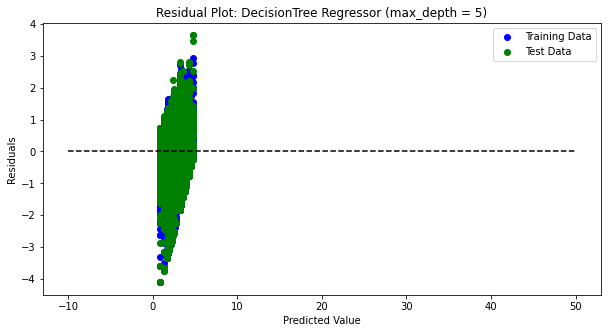

DecisionTree Regressor with max_depth = 20
Mean Squared Error for training data: 0.007
Mean Squared Error for test data: 0.724
R^2 for training data: 0.995
R^2 for test data: 0.450
Running time to fit the model: 135.926 ms



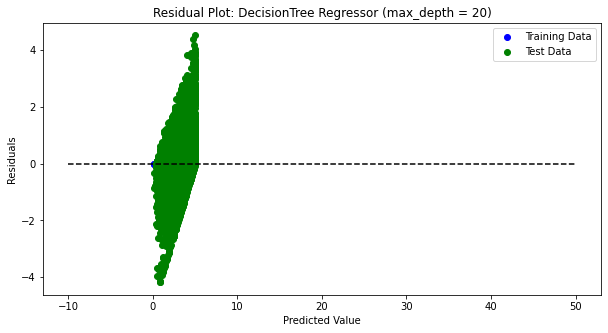

In [8]:
print ('DecisionTree Regressor\n')

dtree1 = DecisionTreeRegressor(max_depth = 5)
dtree2 = DecisionTreeRegressor(max_depth = 20)


# DecisionTree Regressor with max_depth = 5
# Fit
start = time.time()
dtree1.fit(X_train_std,y_train)
finish = time.time()

# Prediction
y_pred = dtree1.predict(X_test_std)

#Prediction on Train set

train_pred = dtree1.predict(X_train_std)

# Checking Performance using different matrix

mse_train = mean_squared_error(y_train,train_pred)
r2_train = r2_score(y_train,train_pred)

mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test, y_pred)

print('DecisionTree Regressor with max_depth = 5')
print('Mean Squared Error for training data: {:.3f}'.format(mse_train))
print('Mean Squared Error for test data: {:.3f}'.format(mse_test))
print('R^2 for training data: {:.3f}'.format(r2_train))
print('R^2 for test data: {:.3f}'.format(r2_test))
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))


# Residual Plot

train_residuals = train_pred - y_train
test_residuals =  y_pred - y_test

plt.figure(figsize=(10, 5))
plt.scatter(train_pred, train_residuals, c= 'blue', label = 'Training Data')
plt.scatter(y_pred, test_residuals, c= 'green', label = 'Test Data')
plt.hlines(y=0,xmin=-10,xmax=50, color='black', linestyle='--')
plt.title('Residual Plot: DecisionTree Regressor (max_depth = 5)')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.legend()
plt.show()

################################################################################################

# DecisionTree Regressor with max_depth = 20
# Fit
start = time.time()
dtree2.fit(X_train_std,y_train)
finish = time.time()

# Prediction
y_pred = dtree2.predict(X_test_std)

#Prediction on Train set

train_pred = dtree2.predict(X_train_std)

# Checking Performance using different matrix

mse_train = mean_squared_error(y_train,train_pred)
r2_train = r2_score(y_train,train_pred)

mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test, y_pred)

print('DecisionTree Regressor with max_depth = 20')
print('Mean Squared Error for training data: {:.3f}'.format(mse_train))
print('Mean Squared Error for test data: {:.3f}'.format(mse_test))
print('R^2 for training data: {:.3f}'.format(r2_train))
print('R^2 for test data: {:.3f}'.format(r2_test))
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))


# Residual Plot

train_residuals = train_pred - y_train
test_residuals =  y_pred - y_test

plt.figure(figsize=(10, 5))
plt.scatter(train_pred, train_residuals, c= 'blue', label = 'Training Data')
plt.scatter(y_pred, test_residuals, c= 'green', label = 'Test Data')
plt.hlines(y=0,xmin=-10,xmax=50, color='black', linestyle='--')
plt.title('Residual Plot: DecisionTree Regressor (max_depth = 20)')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.legend()
plt.show()
